In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00


In [5]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [6]:
img = cv.imread("/content/drive/MyDrive/Dataset/Frames_2/Manush/frame_0000.jpg")

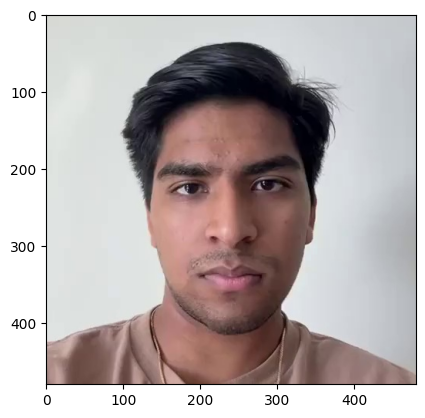

In [7]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
detector = MTCNN()
results = detector.detect_faces(img)

In [9]:
results

[{'box': [128, 109, 212, 295],
  'confidence': 0.9996882677078247,
  'keypoints': {'nose': [241, 286],
   'mouth_right': [284, 331],
   'right_eye': [288, 221],
   'left_eye': [185, 226],
   'mouth_left': [196, 334]}}]

In [10]:
x,y,w,h = results[0]['box']

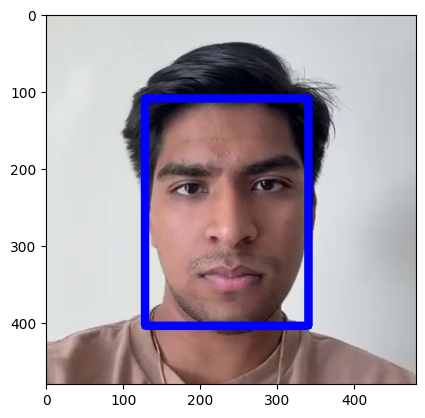

In [11]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 10)
plt.imshow(img)


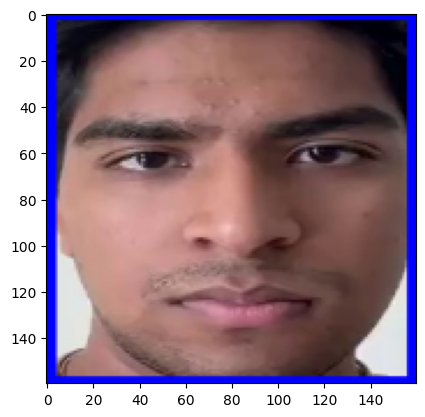

In [12]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
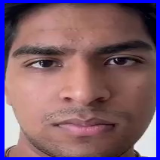

In [13]:
my_face

In [14]:
class FACELOADING:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x,y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self, dir):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES


  def load_classes(self):
    for subdir in os.listdir(self.directory):
      path = self.directory + '/' + subdir + '/'
      faces = self.load_faces(path)
      labels = [subdir for _ in range(len(faces))]
      print(f"Loaded successfully: {len(labels)}")
      ##print(f"Loaded successfully: {labels}")
      self.X.extend(faces)
      self.Y.extend(labels)
    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    plt.figure(figsize=(10,25))
    for num, image in enumerate(self.X):
      ncols = 3
      nrows = len(self.Y)
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')

In [15]:
faceloading = FACELOADING("/content/drive/MyDrive/Dataset/Frames_2")
X, Y = faceloading.load_classes()

Loaded successfully: 15
Loaded successfully: 16
Loaded successfully: 15
Loaded successfully: 13
Loaded successfully: 15


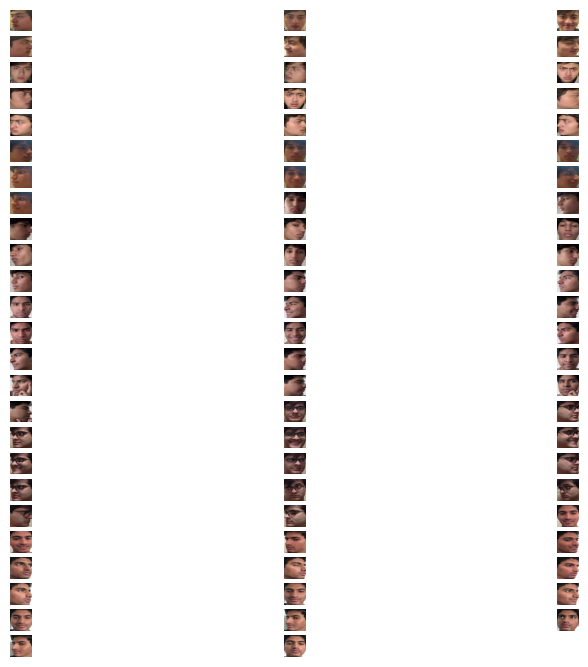

In [16]:
faceloading.plot_images()

#FaceNet Section


In [17]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=bc667b4c5520c812825c7395595df60be71d34e88e2689fa5000bf18efd73783
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [18]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32')
  face_img = np.expand_dims(face_img, axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [19]:
EMBEDDED_X = []
for face in X:
  EMBEDDED_X.append(get_embedding(face))
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [20]:
np.savez_compressed('embeddings.npz', EMBEDDED_X, Y)

# SVM Model

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle = True, random_state=17)

In [23]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)


SVC(kernel='linear', probability=True)

In [24]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_train, ypreds_train))
print(accuracy_score(Y_test, ypreds_test))

1.0
1.0


In [26]:
t_manush = cv.imread("/content/drive/MyDrive/Dataset/test/manush/manush_3.jpeg")
t_manush = cv.cvtColor(t_manush, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_manush)[0]['box']


In [27]:
t_manush = t_manush[y:y+h, x:x+w]
t_manush = cv.resize(t_manush, (160,160))
test_manush = get_embedding(t_manush)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [28]:
test_manush = [test_manush]
ypreds_test_manush = model.predict(test_manush)

In [29]:
ypreds_test_manush

array([2])

In [30]:
encoder.inverse_transform(ypreds_test_manush)

array(['Manush'], dtype='<U8')

In [31]:
# t_random = cv.imread("/content/drive/MyDrive/Dataset/test/Random/RDJ.jpeg")
# t_random = cv.cvtColor(t_random, cv.COLOR_BGR2RGB)
# x,y,w,h = detector.detect_faces(t_random)[0]['box']
# t_random = t_random[y:y+h, x:x+w]
# t_random = cv.resize(t_random, (160,160))
# test_random = get_embedding(t_random)
# test_random = [test_random]
# ypreds_test_random = model.predict(test_random)
# encoder.inverse_transform(ypreds_test_random)

In [32]:
t_sami = cv.imread("/content/drive/MyDrive/Dataset/test/sami/sami_3.jpg")
t_sami = cv.cvtColor(t_sami, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_sami)[0]['box']
t_sami = t_sami[y:y+h, x:x+w]
t_sami = cv.resize(t_sami, (160,160))
test_sami = get_embedding(t_sami)
test_sami = [test_sami]
ypreds_test_sami = model.predict(test_sami)
encoder.inverse_transform(ypreds_test_sami)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array(['Sami'], dtype='<U8')

In [33]:
def predict_face(image_path, detector, encoder, model):
  """
  Predicts the person in an image using a pre-trained face recognition model.

  Args:
      image_path: The path to the image file.
      detector: The face detector object (e.g., MTCNN).
      encoder: The label encoder object.
      model: The trained face recognition model (e.g., SVC).

  Returns:
      The predicted name of the person in the image.
  """
  img = cv.imread(image_path)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  x, y, w, h = detector.detect_faces(img)[0]['box']
  img = img[y:y + h, x:x + w]
  img = cv.resize(img, (160, 160))
  embedding = get_embedding(img)
  embedding = [embedding]
  prediction = model.predict(embedding)
  predicted_name = encoder.inverse_transform(prediction)[0]
  return prediction[0], predicted_name

In [34]:
predicted_label, predicted_name = predict_face("/content/drive/MyDrive/Dataset/test/sami/sami_3.jpg", detector, encoder, model)
predicted_label, predicted_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


(3, 'Sami')

In [35]:
# prompt: a function that calls predict_face with all the images from test folder which has folders inside it that hold the actual image and the folders that hold the image are the actual names
def predict_all_faces_in_test_folder(test_folder_path, detector, encoder, model):
  """
  Predicts faces in all images within subfolders of a test folder.

  Args:
      test_folder_path: Path to the test folder.
      detector: The face detector object.
      encoder: The label encoder object.
      model: The trained face recognition model.

  Returns:
      A dictionary where keys are image paths and values are tuples of
      (predicted_label, predicted_name).
  """
  results = {}
  for person_folder in os.listdir(test_folder_path):
      person_folder_path = os.path.join(test_folder_path, person_folder)
      if os.path.isdir(person_folder_path):
          actual_name = person_folder
          print(f"Processing images in folder: {person_folder}")
          for image_file in os.listdir(person_folder_path):
              image_path = os.path.join(person_folder_path, image_file)
              try:
                  predicted_label, predicted_name = predict_face(image_path, detector, encoder, model)
                  results[image_path] = (predicted_label, predicted_name, actual_name)
              except Exception as e:
                  print(f"Error processing {image_path}: {e}")
                  results[image_path] = ("Error", "Error", actual_name) # Store error info
  return results

In [36]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

def predict_faces_in_folder_using_confidence_interval(test_folder_path, detector, encoder, model, confidence_threshold=0.64):
    """
    Predicts faces in all images within subfolders of a test folder, using a confidence threshold.

    Args:
        test_folder_path: Path to the test folder containing subfolders named after actual names.
        detector: The face detector object.
        encoder: The label encoder object.
        model: The trained face recognition model.
        confidence_threshold: Confidence threshold for predictions.

    Returns:
        A dictionary where keys are image paths and values are tuples of
        (predicted_name, actual_name, confidence).
    """
    results = {}
    for person_folder in os.listdir(test_folder_path):
        person_folder_path = os.path.join(test_folder_path, person_folder)
        if os.path.isdir(person_folder_path):
            actual_name = person_folder
            print(f"Processing images in folder: {actual_name}")

            for image_file in os.listdir(person_folder_path):
                image_path = os.path.join(person_folder_path, image_file)
                try:
                    # Read and preprocess the image
                    image = cv.imread(image_path)
                    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                    detections = detector.detect_faces(image)

                    for i, detection in enumerate(detections):
                        # Extract bounding box
                        x, y, w, h = detection['box']
                        x, y = max(0, x), max(0, y)  # Ensure coordinates are within bounds

                        if detection['confidence'] < 0.99:
                            continue

                        # Crop and preprocess the face
                        face = image[y:y+h, x:x+w]
                        face_resized = cv.resize(face, (160, 160))

                        # Get embeddings for the face
                        face_embedding = get_embedding(face_resized)
                        face_embedding = [face_embedding]

                        # Predict using the model
                        if hasattr(model, "predict_proba"):
                            confidence_scores = model.predict_proba(face_embedding)[0]
                            max_confidence = max(confidence_scores)
                            predicted_index = confidence_scores.argmax()
                        else:
                            predicted_index = model.predict(face_embedding)[0]
                            max_confidence = None

                        # Decode the predicted label
                        if max_confidence is not None and max_confidence >= confidence_threshold:
                            predicted_name = encoder.inverse_transform([predicted_index])[0]
                        else:
                            predicted_name = "unknown"

                        actual_name = person_folder
                        if max_confidence is not None and max_confidence < 0.5:
                            actual_name = "unknown"

                        # Store the result
                        results[image_path] = (predicted_name, actual_name, max_confidence)

                        # Optionally display the face and prediction
                        plt.figure()
                        plt.imshow(face_resized)
                        plt.title(f"Predicted: {predicted_name}, Actual: {actual_name}, Confidence: {max_confidence:.2f}")
                        plt.axis('off')
                        plt.show()

                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
                    results[image_path] = ("Error", actual_name, None)

    return results

Processing images in folder: aakash
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


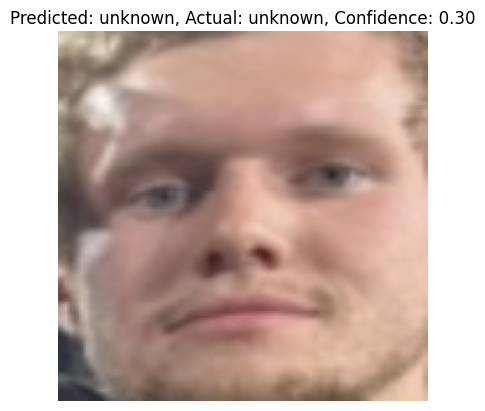

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


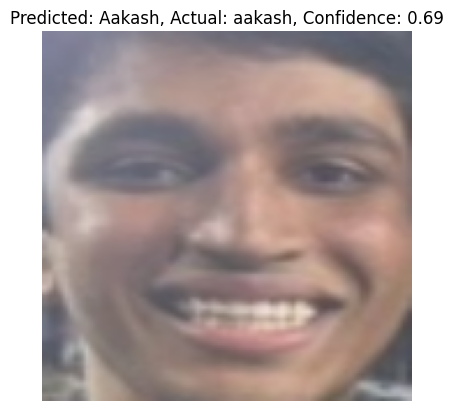

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


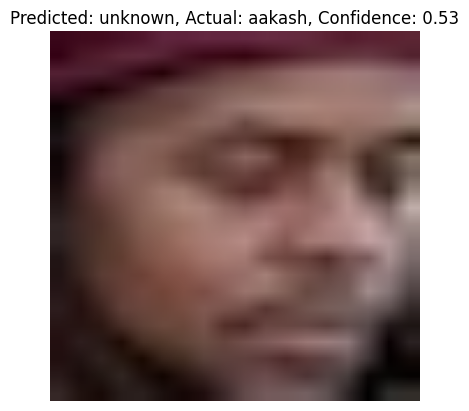

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


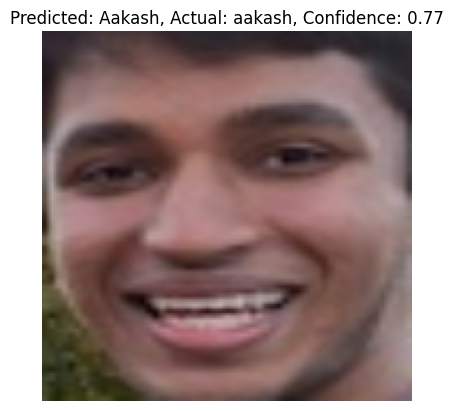

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


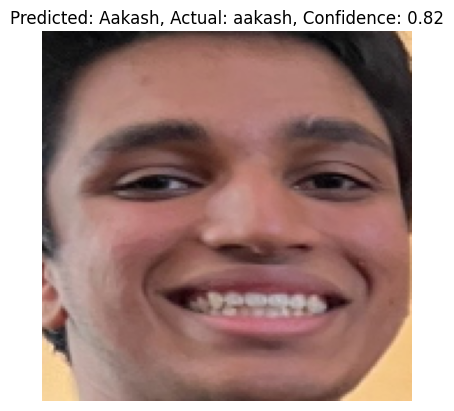

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


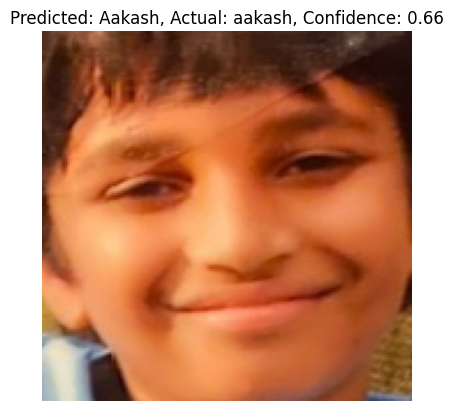

Processing images in folder: akshara
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


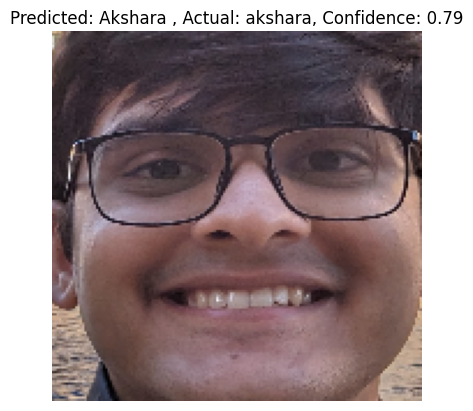

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


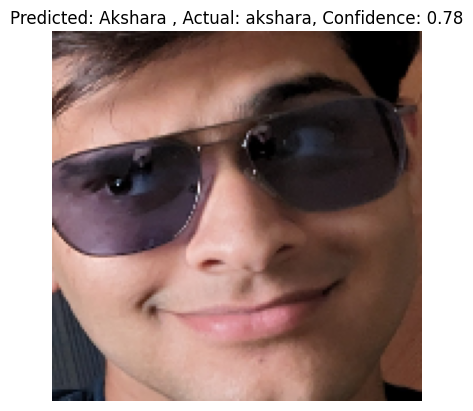

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


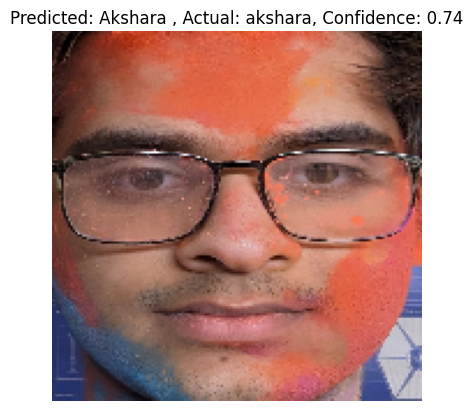

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


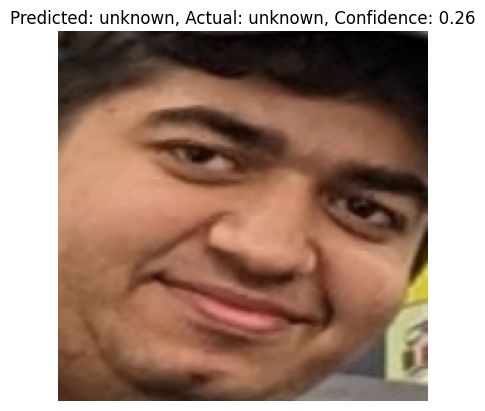

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


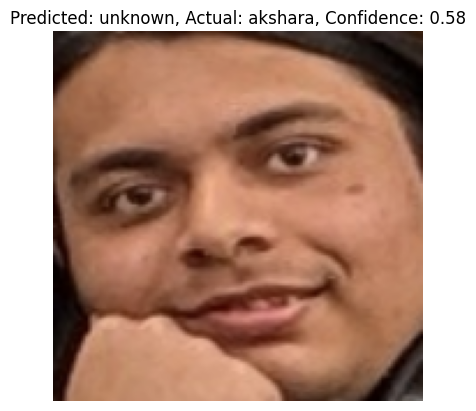

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


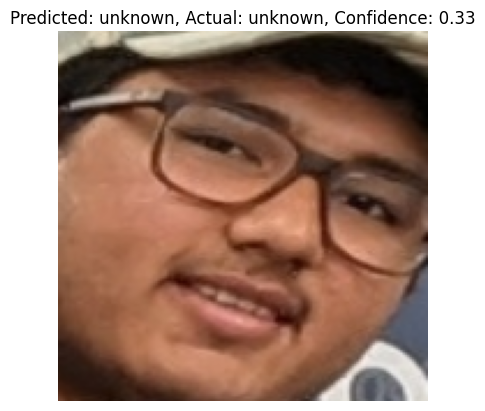

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


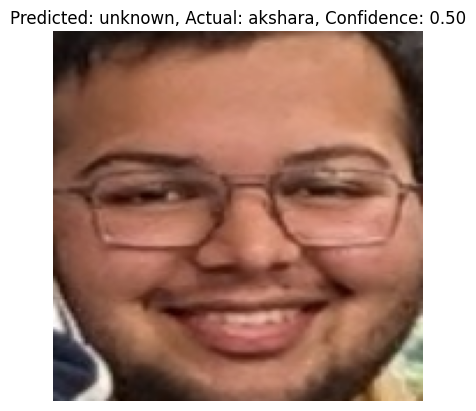

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


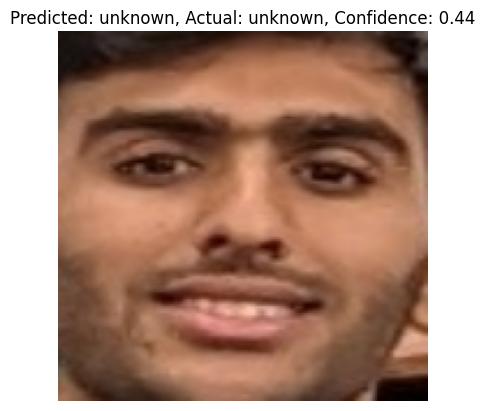

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


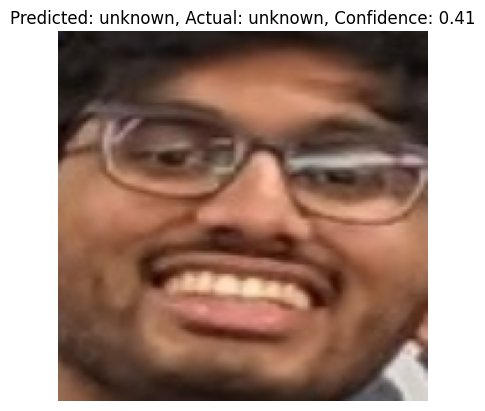

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


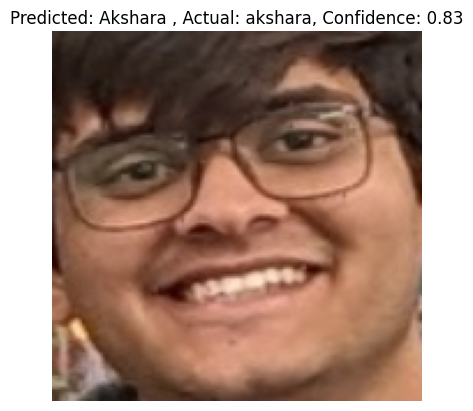

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


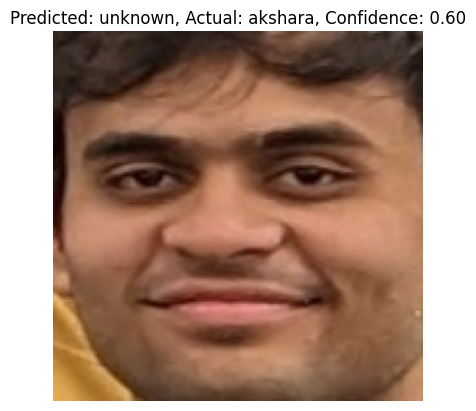

Processing images in folder: sami
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


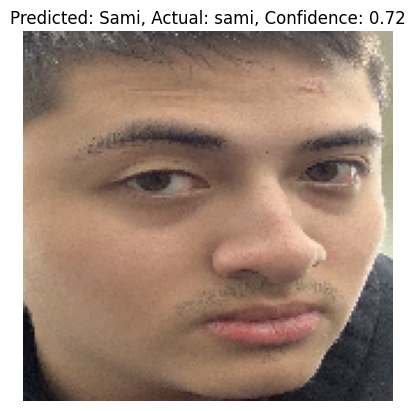

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


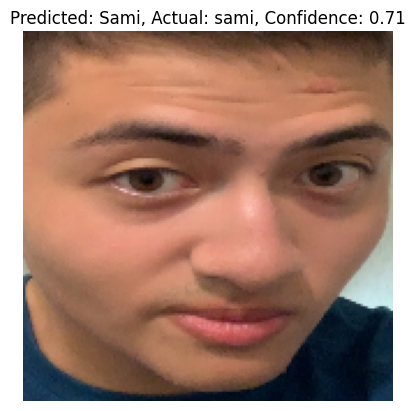

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


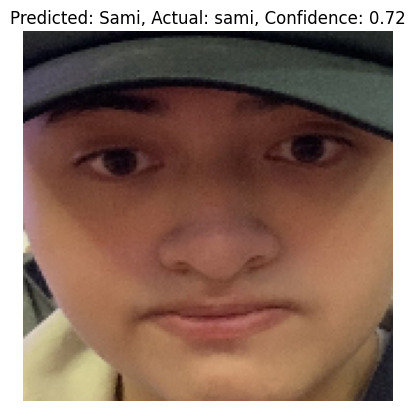

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


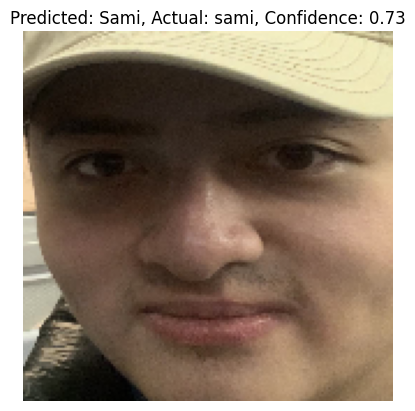

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


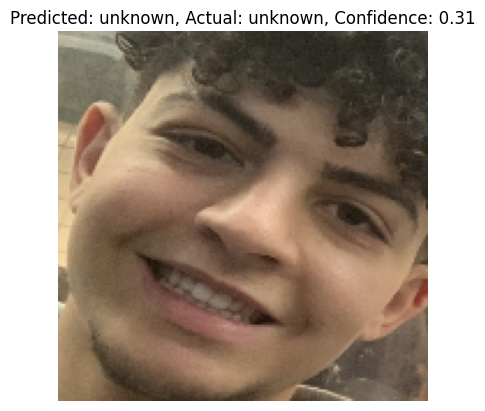

Processing images in folder: manush
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


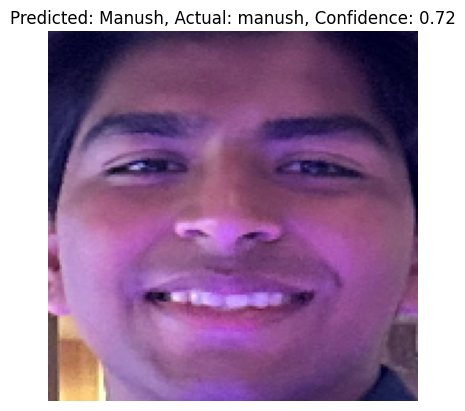

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


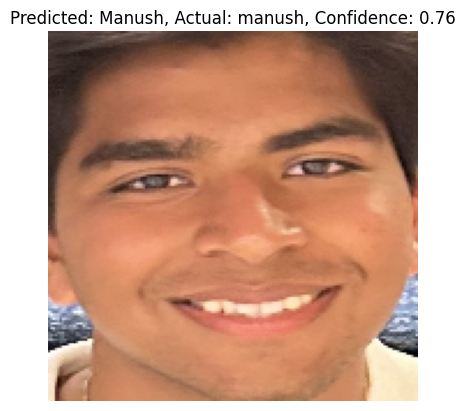

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


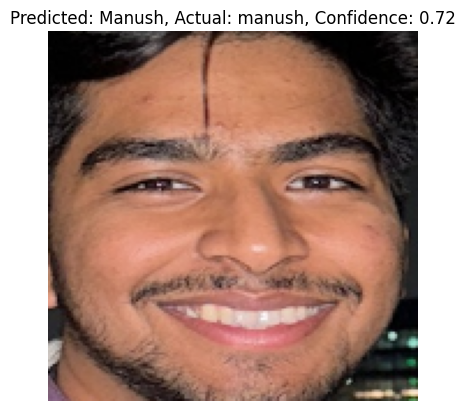

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


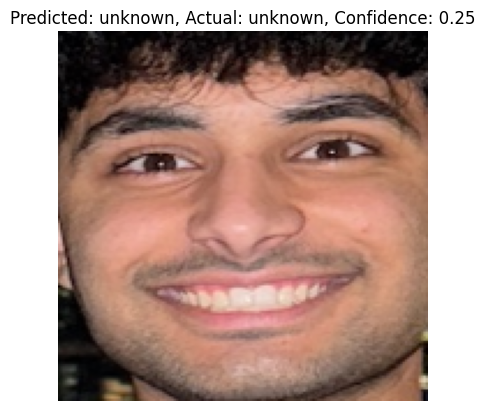

In [ ]:
# Example usage (assuming you have defined predict_face, detector, encoder, and model):
test_folder = "/content/drive/MyDrive/Dataset/test"
predictions = predict_faces_in_folder_using_confidence_interval(test_folder, detector, encoder, model)
print(predictions)

In [ ]:
quantitative_metrics = {}
for image_path, (predicted_name, actual_name, confidence) in predictions.items():
    print(f"Image: {image_path}, Predicted Name: {predicted_name}, Actual Name: {actual_name}")

    predicted_name = predicted_name.lower().strip()
    actual_name = actual_name.lower().strip()

    if actual_name not in quantitative_metrics:
        quantitative_metrics[actual_name] = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    if predicted_name != actual_name and predicted_name != "unknown":
        if predicted_name not in quantitative_metrics:
            quantitative_metrics[predicted_name] = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    if predicted_name == actual_name:
        quantitative_metrics[actual_name]['TP'] += 1
    else:
        quantitative_metrics[actual_name]['FN'] += 1

        if predicted_name != "unknown":
            quantitative_metrics[predicted_name]['FP'] += 1

    for name in quantitative_metrics.keys():
        if name != actual_name and name != predicted_name:
            quantitative_metrics[name]['TN'] += 1
print(quantitative_metrics)

In [ ]:
import matplotlib.pyplot as plt

quantitative_metrics.pop('unknown', None)
for team_member in quantitative_metrics:
    TP = quantitative_metrics[team_member]['TP']
    TN = quantitative_metrics[team_member]['TN']
    FP = quantitative_metrics[team_member]['FP']
    FN = quantitative_metrics[team_member]['FN']

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    print(TP + TN)
    print(TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


    quantitative_metrics[team_member]['Accuracy'] = accuracy
    quantitative_metrics[team_member]['Precision'] = precision
    quantitative_metrics[team_member]['Recall'] = recall
    quantitative_metrics[team_member]['F1 Score'] = f1_score

for quantitative_metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
  categories = list(quantitative_metrics.keys())
  values = [inner_dict.get(quantitative_metric) for inner_dict in quantitative_metrics.values()]

  plt.figure(figsize=(5, 5))
  bars = plt.bar(categories, values, color='skyblue')

  for bar in bars:
      yval = round(bar.get_height(), 2)
      plt.text(
          bar.get_x() + bar.get_width() / 2, yval, f'{yval}',
          ha='center', va='bottom'
      )

  plt.xlabel('Team Member')
  plt.ylabel(quantitative_metric)
  plt.title('Model ' + quantitative_metric + ' on Photos')

  plt.show()